#1

https://www.youtube.com/watch?v=BQg9OZdzLLE
https://github.com/selfedu-rus/neural-network/blob/master/lesson%207.%20keras_grads.py

Дан полином x(x-1)^3(x-2)^2(x-3)^2.
Создайте сеть с входным одним слоем tanh и одним нейроном выходным linear.


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation

x = list(map(lambda x: x/100, range(0, 301)))

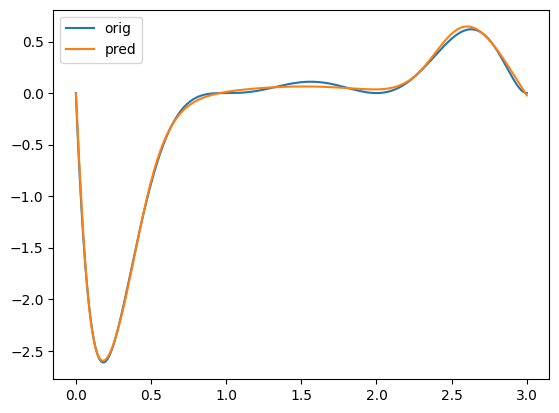

Обучение завершено
1/1 [==============================] - 0s 94ms/step
[[68.0192]]
[array([[0.692785]], dtype=float32), array([-1.2592965], dtype=float32)]


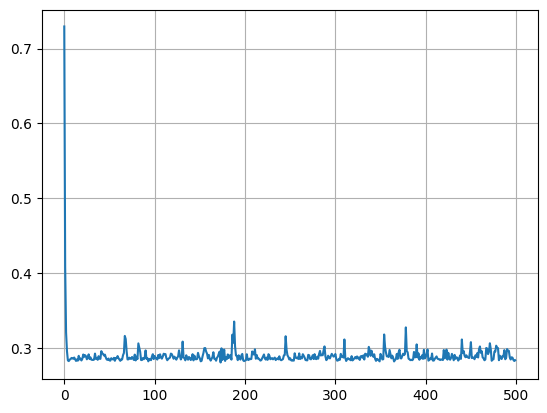

In [2]:
f = list(map(lambda x: x * (x-1)**3 * (x-2)**2 * (x-3)**2, x))
model = keras.Sequential()
model.add(Dense(units=1, input_shape=(1,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

history = model.fit(x, f, epochs=500, verbose=0)
print("Обучение завершено")

print(model.predict([100]))
print(model.get_weights())

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

#2

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
indices = np.array(list(map(lambda x: x[0], y_train))) == 3 # Cat
X_cat = X_train[indices]

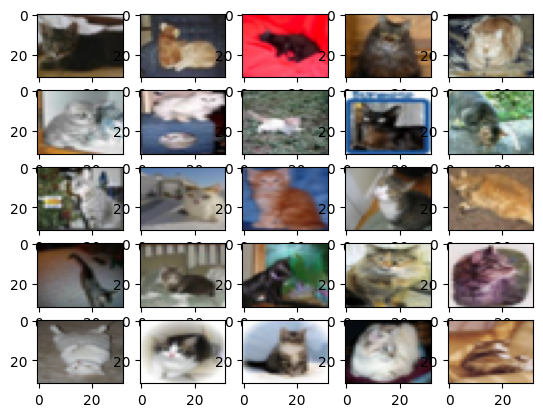

In [6]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_cat[k], aspect='auto')
        k += 1

plt.show()

In [7]:
indices2 = np.array(list(map(lambda x: x[0], y_train))) == 5 # Dog
X_dog = X_train[indices2]

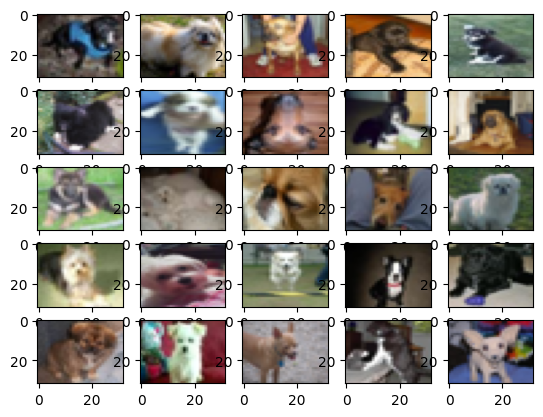

In [8]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_dog[k], aspect='auto')
        k += 1

plt.show()

In [9]:
X_train = np.concatenate([X_cat, X_dog])
y_train = np.array([0]*5000+[1]*5000)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten

https://www.youtube.com/watch?v=oCXh_GFMmOE

2.1) Создайте сеть, где первый слой на 64 нейрона relu с input_shape таким же как у X_train. Потом спрямляем через Flatten. И на выходе 1 нейрон sigmoid.

loss='binary_crossentropy', потому что у нас бинарный ответ - кот или собака.

optimizer='rmsprop'

metrics=['accuracy']

model.fit shuffle=True

2.2) Добавьте BatchNormalization и небольшой Dropout. Временно используйте epochs=5, чтобы долго не ждать. Потом добавьте ещё 1 слой на 100 нейронов, ещё BatchNormalization, ещё Dropout и если есть результат, то можно увеличить число epochs.

In [11]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

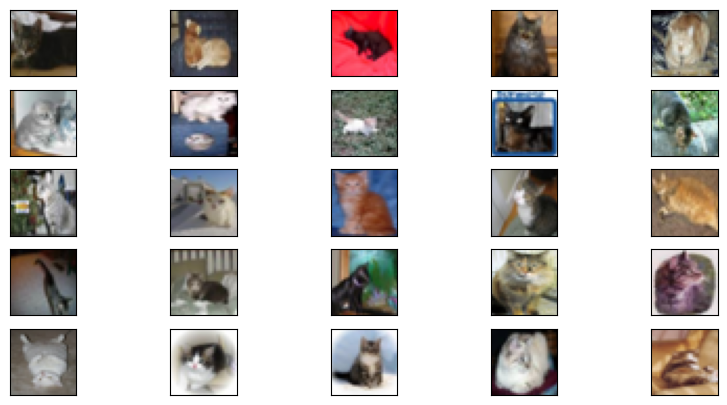

In [12]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)

plt.show()

In [29]:
model = keras.Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(64, activation='relu'),
    Dense(1, activation='softmax')
])

In [30]:
print(model.summary())      # вывод структуры НС в консоль


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                196672    
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 196737 (768.50 KB)
Trainable params: 196737 (768.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [32]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=28, epochs=5, validation_split=0.2, shuffle=True)

model.evaluate(X_test, y_test)

Epoch 1/5
286/286 [==============================] - 5s 15ms/step - loss: 1.0871 - accuracy: 0.3750 - val_loss: 0.7884 - val_accuracy: 1.0000
Epoch 2/5
286/286 [==============================] - 2s 8ms/step - loss: 1.0536 - accuracy: 0.3750 - val_loss: 0.8682 - val_accuracy: 1.0000
Epoch 3/5
286/286 [==============================] - 1s 5ms/step - loss: 1.0410 - accuracy: 0.3750 - val_loss: 0.9220 - val_accuracy: 1.0000
Epoch 4/5
286/286 [==============================] - 1s 5ms/step - loss: 0.9582 - accuracy: 0.3750 - val_loss: 0.9456 - val_accuracy: 1.0000
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.6764 - accuracy: 0.1000


[2.6763529777526855, 0.10000000149011612]

1/1 [==============================] - 0s 32ms/step
[[1.]]
0


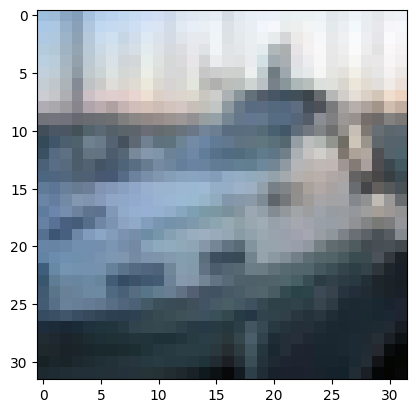

In [35]:
n = 2
x = np.expand_dims(X_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(X_test[n], cmap=plt.cm.binary)
plt.show()

In [34]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 2s 7ms/step
(10000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]]


In [41]:
model = keras.Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='softmax') ])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=28, epochs=5, validation_split=0.2, shuffle=True)

model.evaluate(X_test, y_test)

Epoch 1/5
286/286 [==============================] - 4s 9ms/step - loss: 0.6724 - accuracy: 0.3750 - val_loss: 1.3673 - val_accuracy: 1.0000
Epoch 2/5
286/286 [==============================] - 2s 6ms/step - loss: 0.6426 - accuracy: 0.3750 - val_loss: 1.6433 - val_accuracy: 1.0000
Epoch 3/5
286/286 [==============================] - 2s 6ms/step - loss: 0.6365 - accuracy: 0.3750 - val_loss: 1.0462 - val_accuracy: 1.0000
Epoch 4/5
286/286 [==============================] - 2s 6ms/step - loss: 0.6325 - accuracy: 0.3750 - val_loss: 1.0923 - val_accuracy: 1.0000
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 3.6818 - accuracy: 0.1000


[3.681823492050171, 0.10000000149011612]